In [44]:
import pyodbc
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

In [22]:
connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="FH_Master_2122",
    database="forschung"
)

cursor = connection.cursor()
cursor.execute("SELECT * FROM diagnosen")
myresult = cursor.fetchall()

diagnoses = pd.DataFrame(myresult, columns = ['id', 'klientid','giltab','giltbis','bezeichnung','code','status','statusname'])

a = diagnoses.bezeichnung.unique()
diabetes = []
for dia in list(a):
    try:
        if "diab" in dia:
            diabetes.append(dia)
    except:
        continue
diab_diagnoses = diagnoses[diagnoses.bezeichnung.isin(diabetes)]
klienten1 = list(diab_diagnoses.klientid.unique())
#klientenF1 = [int(str(id)+"01") for id in klienten]

cursor.execute("SELECT * FROM vitalwerte")
myresult = cursor.fetchall()
vital1 = pd.DataFrame(myresult, columns = ['id', 'klientid','datum','bezeichnung','wert','einheit','wurdeunterschritten','wurdeueberschritten'])
vital1 = vital1[vital1.klientid.isin(klienten1)]

vital1["klientid2"] = vital1["klientid"]*100 +1
klienten21 = list(vital1.klientid2.unique())

In [23]:
cursor.close()
connection.disconnect()


In [24]:
# Trusted Connection to Named Instance
connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                            'SERVER=pc-caro;DATABASE=Forschung02;'
                            'Trusted_Connection=yes;')
cursor=connection.cursor()

In [25]:
diagnoses = pd.read_sql_query('SELECT * FROM diagnosen', connection)
diagnoses.columns = ['id', 'klientid','giltab','giltbis','bezeichnung','code','status','statusname']
a = diagnoses.bezeichnung.unique()
diabetes = []
for dia in list(a):
    try:
        if "diab" in dia:
            diabetes.append(dia)
    except:
        continue
diab_diagnoses = diagnoses[diagnoses.bezeichnung.isin(diabetes)]
klienten2 = list(diab_diagnoses.klientid.unique())
diab_diagnoses

,id,klientid,giltab,giltbis,bezeichnung,code,status,statusname
474,475,1348,2014-06-10 00:00:00,NaT,diabetes mellitus typ 2 BOT,None,-1,Keine Angabe
531,532,2117,2015-01-29 00:00:00,NaT,Immobilitätssyndrom bei Wundheilungsstörungen ...,None,-1,Keine Angabe
535,536,2117,2015-01-29 00:00:00,NaT,Retinopathia diabetica,None,-1,Keine Angabe
585,586,391,2013-08-06 00:00:00,NaT,diab. Nephropathie,None,-1,Keine Angabe
806,807,1356,2014-06-12 00:00:00,NaT,"Diabetes Mellitus Typ II, orale Antidiabetika",None,-1,Keine Angabe
...,...,...,...,...,...,...,...,...
517273,517274,10510,2016-05-26 00:00:00,NaT,13.09.2012 diabet. Polyneuropathie bei Diabete...,None,-1,Keine Angabe
517420,517421,4717,2016-05-27 00:00:00,NaT,diab. Retinopathie bds,None,-1,Keine Angabe
517421,517422,4717,2016-05-27 00:00:00,NaT,diab. Maculapathie bds.,None,-1,Keine Angabe
517568,517569,10676,2016-05-28 00:00:00,NaT,diabetische Polyneruropathie,None,-1,Keine Angabe


In [26]:
vital2 = pd.read_sql_query('SELECT * FROM vitalwerte', connection)
vital2.columns = ['id', 'klientid','datum','bezeichnung','wert','einheit','wurdeunterschritten','wurdeueberschritten']
vital2 = vital2[vital2.klientid.isin(klienten2)]
vital2["klientid2"] = vital2["klientid"]*100 +2
klienten22 = list(vital2.klientid2.unique())

In [27]:
cursor.close()
connection.close()

In [28]:
# Trusted Connection to Named Instance
connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                            'SERVER=pc-caro;DATABASE=Forschung03;'
                            'Trusted_Connection=yes;')
cursor=connection.cursor()

In [29]:
diagnoses = pd.read_sql_query('SELECT * FROM diagnosen', connection)
diagnoses.columns = ['id', 'klientid','giltab','giltbis','bezeichnung','code','status','statusname']
a = diagnoses.bezeichnung.unique()
diabetes = []
for dia in list(a):
    try:
        if "diab" in dia:
            diabetes.append(dia)
    except:
        continue
diab_diagnoses = diagnoses[diagnoses.bezeichnung.isin(diabetes)]
klienten3 = list(diab_diagnoses.klientid.unique())
diab_diagnoses

,id,klientid,giltab,giltbis,bezeichnung,code,status,statusname
523,524,399,2006-03-08 00:00:00,NaT,Insulinpfl. diab. mellitus mit diabetischer R...,None,-1,Keine Angabe
918,919,788,2005-11-08 00:00:00,NaT,Retinopathia diabetica,H36.0,-1,Keine Angabe
965,966,1259,2006-03-09 00:00:00,NaT,Insulinpfl. diabetes mellitus,None,-1,Keine Angabe
1840,1841,11609,2010-06-30 00:00:00,NaT,diabetische Polyneurophatie,None,-1,Keine Angabe
1976,1977,11685,2009-06-21 00:00:00,NaT,Diabetes mellitus mit diabetischer Nephropathi...,None,-1,Keine Angabe
...,...,...,...,...,...,...,...,...
127967,127968,13622,2013-05-15 00:00:00,NaT,Diabetes Mellitus Typ 2 mit diabetischer polyn...,None,-1,Keine Angabe
128245,128246,21016,2013-05-23 00:00:00,NaT,akute auf chronische Niereninsuffizienz unter...,None,2,Gesichert
128798,128799,21220,2013-06-24 00:00:00,NaT,diabetes mellitus,None,-1,Keine Angabe
128951,128952,21258,2013-07-02 00:00:00,NaT,Chronische Niereninsuffizienz Stadium III nach...,None,2,Gesichert


In [30]:
vital3 = pd.read_sql_query('SELECT * FROM vitalwerte', connection)
vital3.columns = ['id', 'klientid','datum','bezeichnung','wert','einheit','wurdeunterschritten','wurdeueberschritten']
vital3 = vital3[vital3.klientid.isin(klienten3)]
vital3["klientid2"] = vital3["klientid"]*100 +3
klienten23 = list(vital3.klientid2.unique())

In [31]:
cursor.close()
connection.close()

In [34]:
len(klienten21), len(klienten22), len(klienten23)

(205, 1356, 330)

In [35]:
allklienten = klienten21 + klienten22 + klienten23
len(allklienten)
#1891 Patienten mit Diabeteserkrankung

1891

In [63]:
vital = pd.concat([vital1, vital2, vital3], ignore_index=True)
vital_bz = vital[vital.bezeichnung == 'Blutzucker']
bz_klienten = list(vital_bz.klientid2.unique())
len(bz_klienten)
#1380 Patienten mit Blutzucker als Vitalparameter

1380

In [ ]:
anzahl_je_klient = vital_bz.klientid2.value_counts()
klienten_with_data = list(anzahl_je_klient[anzahl_je_klient > 100].index)
len(klienten_with_data)

#616 Patienten mit mindestens 100 Messungen

1323503    8963
593401     8889
1758003    8702
196902     8680
982901     8340
           ... 
643802      102
4742402     102
1568201     102
6027702     101
1043501     101
Name: klientid2, Length: 616, dtype: int64

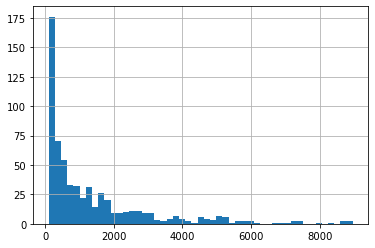

In [61]:
vital_bz2 = vital_bz[vital_bz.klientid2.isin(klienten_with_data)]
anzahl = vital_bz2.klientid2.value_counts()
anzahl.hist(cumulative=False, bins = int(np.sqrt(len(anzahl))*2))
anzahl

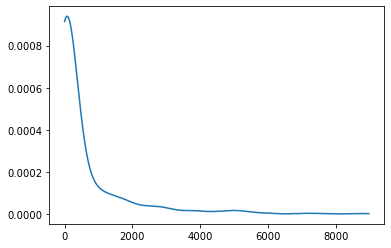

In [60]:

import scipy.stats as stats

series = anzahl_je_klient.to_numpy()
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)
plt.figure()
plt.plot(positions,dichtefunktion(positions))
plt.show()

Timestamp('2006-02-14 08:39:00')

In [72]:
d = {}
for klient in klienten_with_data:
    data = vital_bz2[vital_bz2.klientid2 == klient]
    delta = data.datum.max() - data.datum.min()
    f = len(data)
    d[klient] = [delta, f]

In [88]:
days = [x[0].days for x in d.values()]
counts = [x[1] for x in d.values()]
freq = [x[1]/x[0].days for x in d.values()] #Frequenz pro Trag

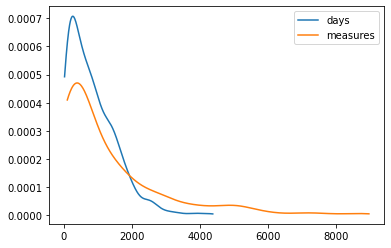

In [98]:
plt.figure()
series = np.array(days)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="days")

series = np.array(counts)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="measures")

plt.legend()
plt.show()

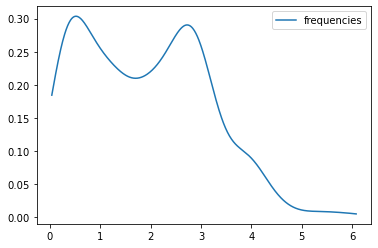

In [101]:
plt.figure()
series = np.array(freq)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="frequencies")

plt.legend()
plt.show()